In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib.pyplot import figure
#figure(figsize=(20, 10))
matplotlib.rcParams['figure.figsize'] = (15,8)  ##to resize the size of plot

In [77]:
#to get all available styles in matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [78]:
df = pd.read_csv('movies.csv')

# DATA EXPLORATION

In [79]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [80]:
df.shape

(7668, 15)

In [81]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [82]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [83]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [84]:
#having a look at all those MOVIES whose budget is not available in dataset
df_budget_NA = df[df['budget'].isna()]
df_budget_NA

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [85]:
## where gross is NaN
df_gross_NA = df[df['gross'].isna()]
df_gross_NA

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
27,Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.0,4100.0,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000.0,NaN,ITC Films,115.0
41,Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.9,13000.0,Bruce Beresford,Jonathan Hardy,Edward Woodward,Australia,NaN,NaN,The South Australian Film Corporation,107.0
47,The Boogey Man,R,Horror,1980,"November 7, 1980 (United States)",4.6,3900.0,Ulli Lommel,Ulli Lommel,Suzanna Love,United States,300000.0,NaN,The Jerry Gross Organization,82.0
49,Lion of the Desert,PG,Biography,1980,"May 16, 1981 (Japan)",8.3,15000.0,Moustapha Akkad,David Butler,Anthony Quinn,Libya,35000000.0,NaN,Falcon International Productions,173.0
52,Can't Stop the Music,PG,Biography,1980,"June 20, 1980 (United States)",4.2,3700.0,Nancy Walker,Bronte Woodard,Ray Simpson,United States,20000000.0,NaN,EMI Films,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [86]:
df_rating_NA = df[df['rating'].isna()]
df_rating_NA

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
78,Babylon,NaN,Drama,1980,November 1980 (United Kingdom),7.4,1300.0,Franco Rosso,Franco Rosso,David N. Haynes,United Kingdom,NaN,109749.0,Diversity Music,95.0
91,Mantis Fist Fighter,NaN,Action,1980,"July 9, 1982 (United States)",6.7,230.0,Wing-Cho Yip,Hsin-Yi Chang,Ka-Yan Leung,Hong Kong,NaN,NaN,East Asia Film Company,89.0
102,Das Boot,NaN,Adventure,1981,"February 10, 1982 (United States)",8.3,237000.0,Wolfgang Petersen,Wolfgang Petersen,Jürgen Prochnow,West Germany,NaN,11487676.0,Bavaria Film,149.0
298,The State of Things,NaN,Drama,1982,"February 18, 1983 (United States)",7.0,3000.0,Wim Wenders,Robert Kramer,Allen Garfield,West Germany,NaN,3700.0,Gray City,121.0
464,White Star,NaN,Drama,1983,"March 8, 1985 (West Germany)",6.0,235.0,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,100000.0,NaN,NaN,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [87]:
df.genre.unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

### for simplicity here i am dropping all NA values

##### as here the focus is on correlation ONLY!!

In [88]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [89]:
col_subset = [ 'rating', 'released', 'score', 'votes','writer', 'star', 'country', 'budget', 'gross', 'company','runtime']
df = df.dropna(axis = 0,subset=col_subset)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [91]:
df['budget'] =df['budget'].astype('int64')
df['votes'] =df['votes'].astype('int64')
df['gross'] =df['gross'].astype('int64')
df['runtime'] =df['runtime'].astype('int64')

In [92]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


# CORRELATION

- GROSS REVENUE will have high correlation to BUDGET
    - maybe?
- GROSS REVENUE will have high correlation to COMPANY

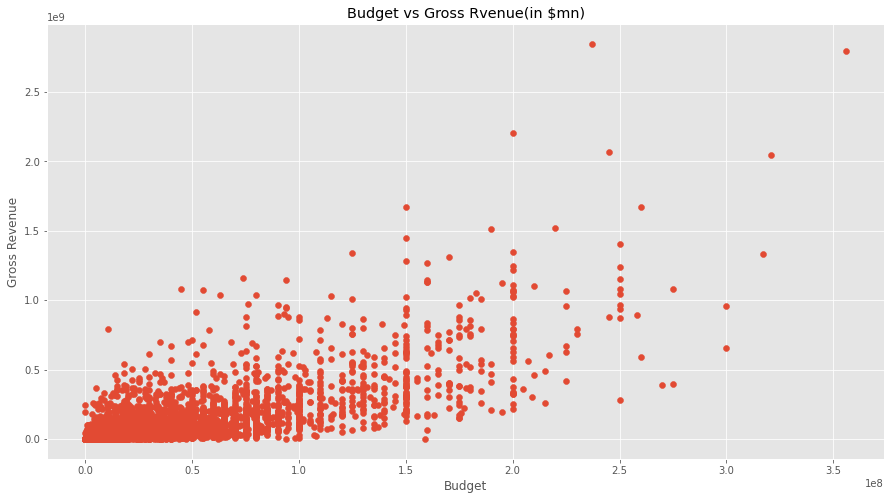

In [93]:
#scatter plot with budget vs gross revenue
plt.scatter(x=df.budget,y=df.gross)
plt.title('Budget vs Gross Rvenue(in $mn)')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

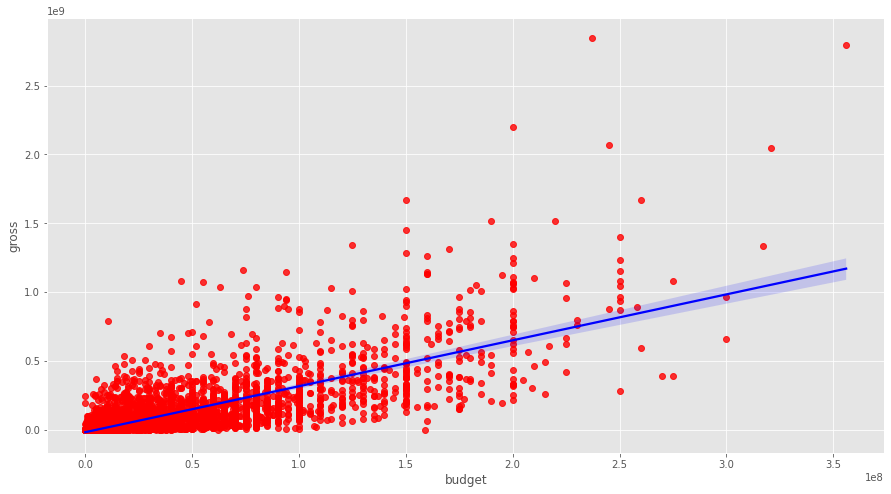

In [94]:
sns.regplot(x='budget',y='gross',data =df,scatter_kws={'color':'r'},line_kws={'color':'b'})

###### let's look at correlation

In [95]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [96]:
corr_matrix = df.corr()#by default it's pearson correlation
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


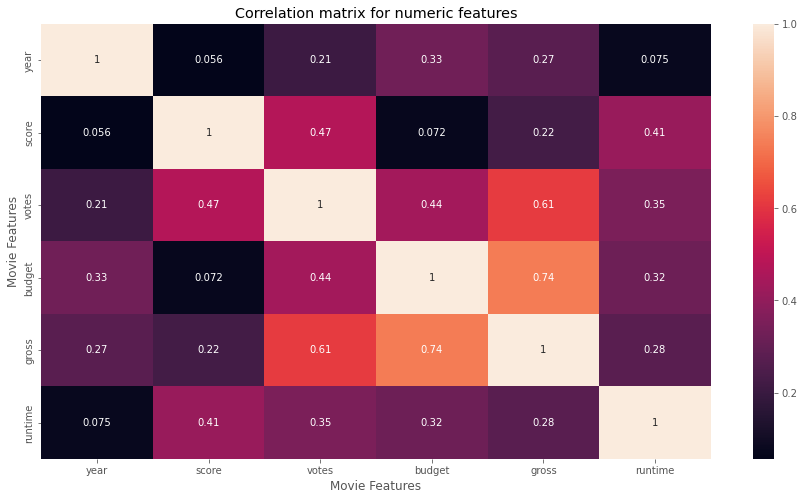

In [97]:
##heatmap on  correlation matrix 
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [98]:
df_numrized = df.copy()

for col_name in df_numrized.columns:
    if (df_numrized[col_name].dtype == 'object'):
        df_numrized[col_name] = df_numrized[col_name].astype('category')
        df_numrized[col_name] = df_numrized[col_name].cat.codes

df_numrized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100


In [99]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


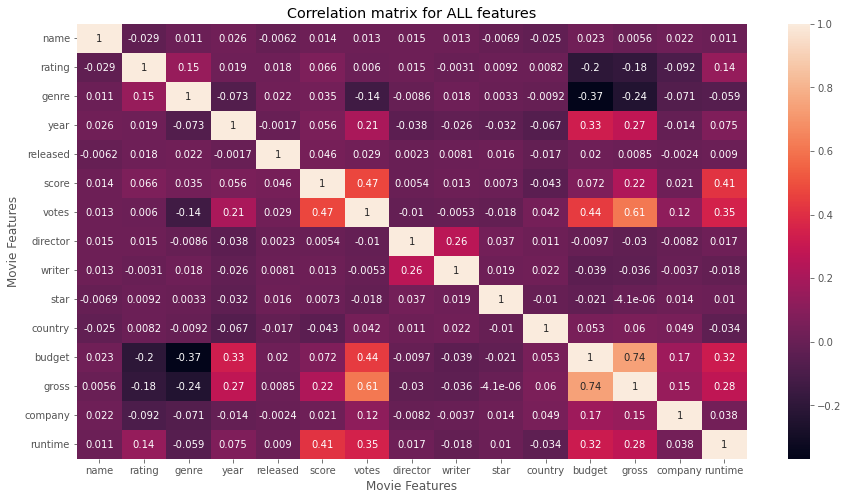

In [101]:
##heatmap on  correlation matrix 
corr_matrix = df_numrized.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation matrix for ALL features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [102]:
df_numrized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


#pd.set_option('display_max_columns',None) --- to look at all columns in the data frame

In [103]:
correlation_mat = df_numrized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [107]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [113]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# CONCLUSIONS:-

- Votes and Budgets have highest correlation to Gross Revenue/Earnings
- Votes and Gross is also somewhat correlated
- Company has low correlation with Gross Earnings